## Auto Rifles Statistics

### Available Keys for Dataframe

In [24]:
from json import loads

auto_rifle_keys = set()
file = open("../weapons.json", "r", encoding="utf-8")
all_auto_rifles = [x for x in loads(file.read()) if x['displayName'] == 'Auto Rifle']
for rifle in all_auto_rifles:
    stat_list = rifle["stats"]
    for stat in stat_list:
        name = stat['name']
        if name == 'Power' or name == 'Attack' or name == 'Stat':
            continue
        else:
            auto_rifle_keys.add(stat["name"])

rifle_keys = list([x for x in auto_rifle_keys if x != ''])

print(rifle_keys)

file.close()

['Reload Speed', 'Airborne Effectiveness', 'Impact', 'Stability', 'Aim Assistance', 'Magazine', 'Inventory Size', 'Handling', 'Recoil Direction', 'Range', 'Rounds Per Minute', 'Zoom']


### Create Generic Dataframe of Values

In [25]:
auto_rifle_values_list = {}

for rifle in all_auto_rifles:
    stat_list = rifle["stats"]
    for stat in stat_list:
        name = stat['name']
        if name == 'Power' or name == 'Attack' or name == 'Stat':
            continue
            
        if name == '':
            continue
        
        if name not in auto_rifle_values_list:
            auto_rifle_values_list[name] = []
            auto_rifle_values_list[name].append(stat['value'])
        else:
            auto_rifle_values_list[name].append(stat['value'])

print(auto_rifle_values_list)

{'Zoom': [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 16, 16, 15, 16, 16, 16, 16, 16, 16, 16, 20, 16, 16, 16, 16, 20, 16, 16, 16, 20, 16, 17, 19, 18, 18, 16, 17, 16, 16, 15, 16, 19, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 16, 16, 15, 15, 18, 19, 16, 16, 16, 16, 16, 16, 16, 16, 19, 15, 16, 16, 17, 20, 17, 16, 16, 16, 16, 16, 16], 'Rounds Per Minute': [80, 80, 20, 80, 0, 20, 100, 80, 20, 100, 80, 0, 80, 80, 100, 20, 80, 20, 20, 100, 80, 20, 20, 80, 100, 80, 100, 80, 20, 80, 20, 20, 80, 80, 80, 80, 20, 100, 80, 0, 100, 20, 100, 80, 20, 20, 0, 20, 80, 100, 0, 100, 80, 20, 80, 0, 100, 20, 80, 20, 20, 80, 0, 100, 0, 80, 80, 20, 80, 100, 20, 20, 80, 100, 80, 100, 0, 80, 20, 20, 100, 20, 0, 80, 80, 80, 0, 100, 0, 80, 80, 100, 20, 100, 20, 20, 100, 0, 20, 100, 100, 80, 100, 

In [34]:
for item in auto_rifle_values_list.items():
    print(f'Name: {item[0]} {len(item[1])}')

Name: Zoom 136
Name: Rounds Per Minute 136
Name: Impact 136
Name: Range 136
Name: Stability 136
Name: Magazine 136
Name: Reload Speed 136
Name: Inventory Size 136
Name: Handling 136
Name: Aim Assistance 136
Name: Recoil Direction 136
Name: Airborne Effectiveness 118


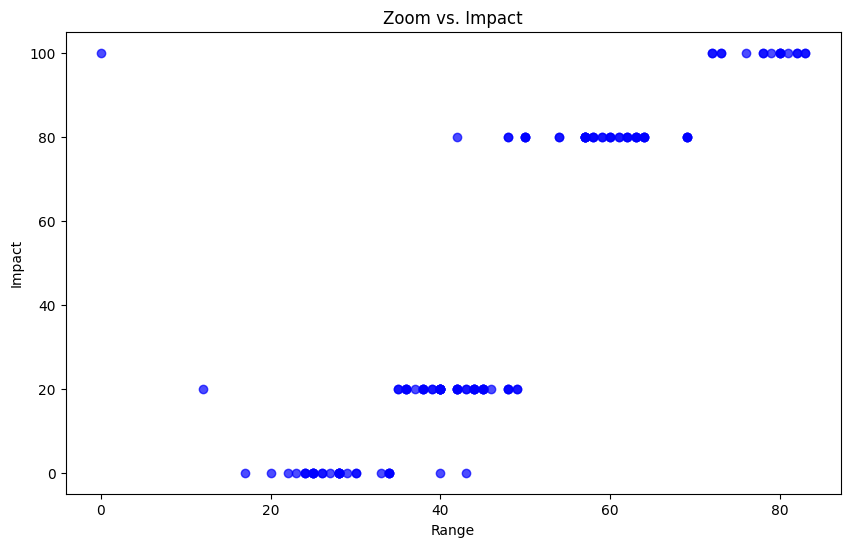

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(auto_rifle_values_list['Range'], auto_rifle_values_list['Impact'], alpha=0.7, c='blue')
plt.xlabel('Range')
plt.ylabel('Impact')
plt.title('Zoom vs. Impact')
plt.show()

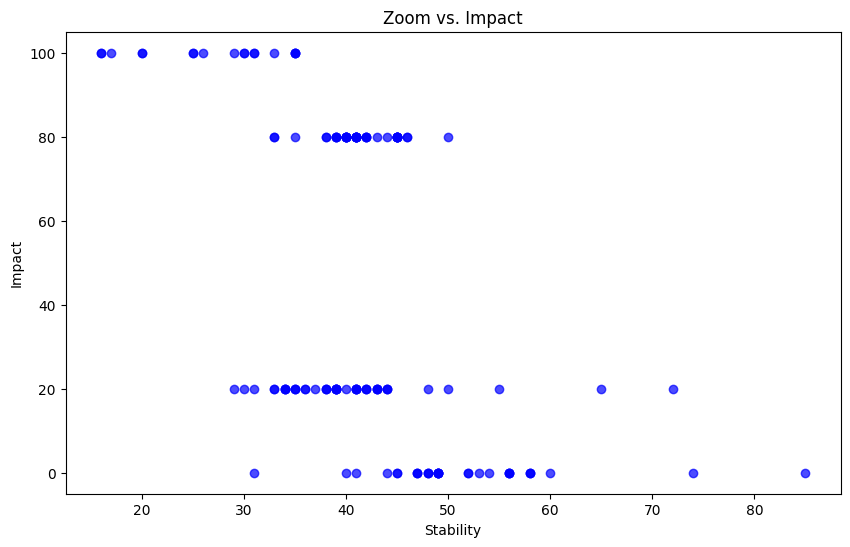

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(auto_rifle_values_list['Stability'], auto_rifle_values_list['Impact'], alpha=0.7, c='blue')
plt.xlabel('Stability')
plt.ylabel('Impact')
plt.title('Zoom vs. Impact')
plt.show()

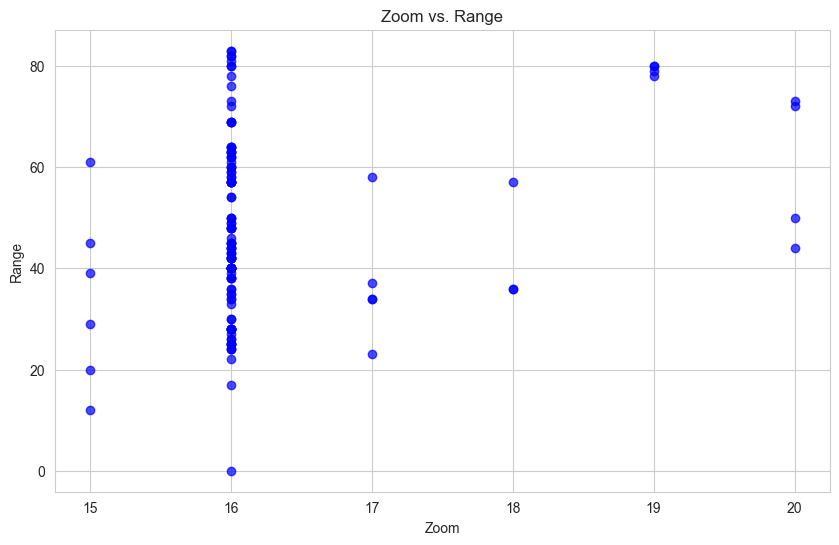

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(auto_rifle_values_list['Zoom'], auto_rifle_values_list['Range'], alpha=0.7, c='blue')
plt.xlabel('Zoom')
plt.ylabel('Range')
plt.title('Zoom vs. Range')
plt.show()

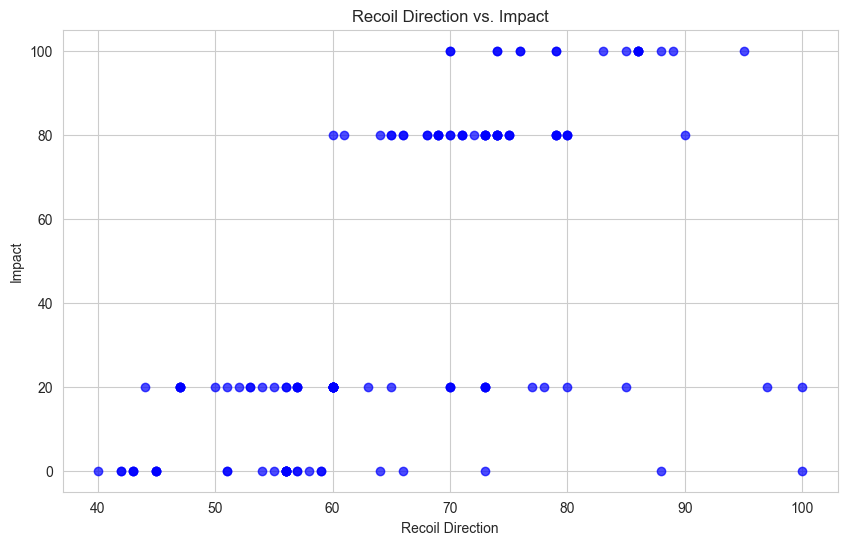

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(auto_rifle_values_list['Recoil Direction'], auto_rifle_values_list['Impact'], alpha=0.7, c='blue')
plt.xlabel('Recoil Direction')
plt.ylabel('Impact')
plt.title('Recoil Direction vs. Impact')
plt.show()

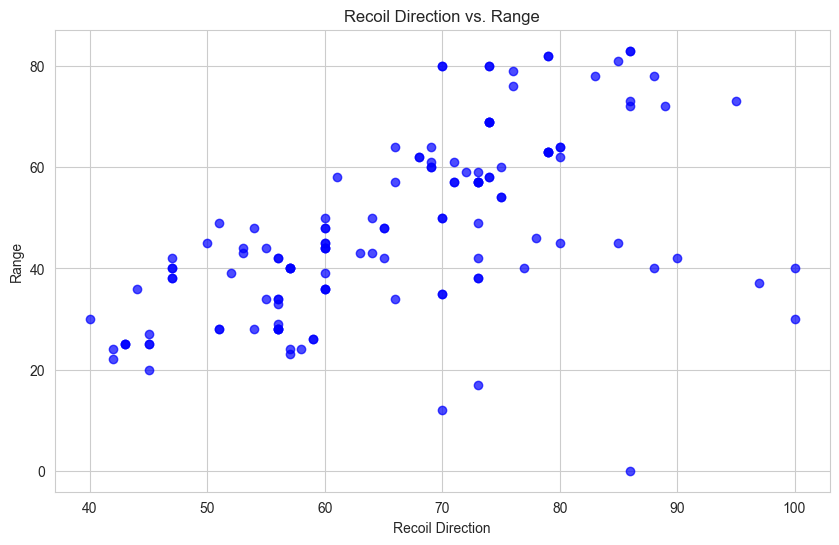

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(auto_rifle_values_list['Recoil Direction'], auto_rifle_values_list['Range'], alpha=0.7, c='blue')
plt.xlabel('Recoil Direction')
plt.ylabel('Range')
plt.title('Recoil Direction vs. Range')
plt.show()

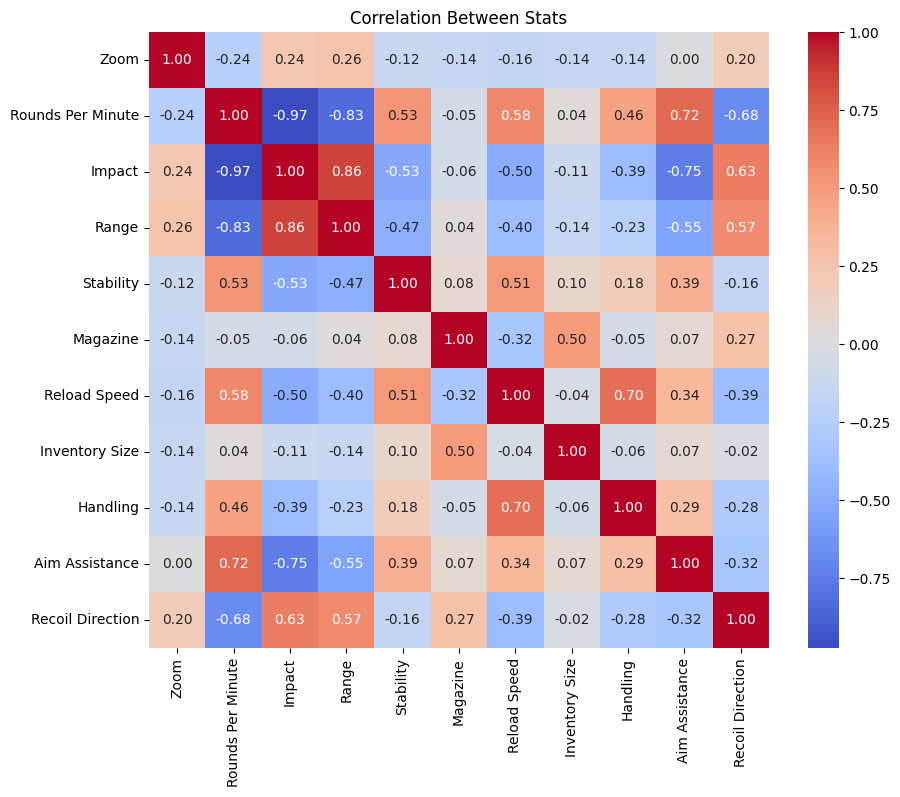

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Converting data to a DataFrame
auto_rifle_values_list.__delitem__('Airborne Effectiveness')
df = pd.DataFrame(auto_rifle_values_list)

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Stats')
plt.show()

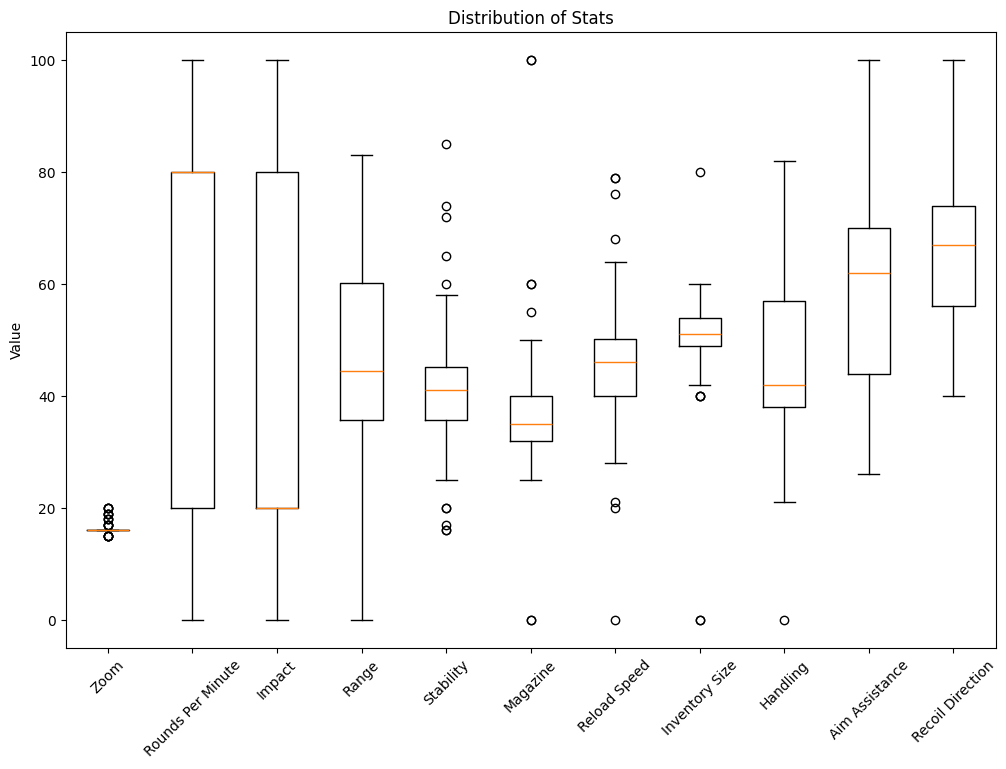

In [37]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
plt.boxplot(auto_rifle_values_list.values(), tick_labels=auto_rifle_values_list.keys())
plt.title('Distribution of Stats')
plt.xticks(rotation=45)
plt.ylabel('Value')
plt.show()